In [13]:
import scipy
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [2]:
# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

In [6]:
# Example split based on geographic regions (latitude)
N = 10
latitudes = X[:, -2]  # Assuming latitude is the second last feature
bins = np.linspace(latitudes.min(), latitudes.max(), N+1)
group_indices = np.digitize(latitudes, bins) - 1

# Create splits
X_splits = [X[group_indices == i] for i in range(N)]
y_splits = [y[group_indices == i] for i in range(N)]
X_splits_train, X_splits_test = [data[:-100] for data in X_splits], [data[-100:] for data in X_splits]
y_splits_train, y_splits_test = [data[:-100] for data in y_splits], [data[-100:] for data in y_splits]
print(list(map(len, X_splits_train)))
print(list(map(len, X_splits_test)))

[1696, 8887, 647, 374, 1192, 4612, 1640, 390, 224, 0]
[100, 100, 100, 100, 100, 100, 100, 100, 100, 76]


In [33]:
penguins = pd.read_csv("data/penguins.csv")
penguins.dropna(how="any", inplace=True)

cols = ["species", "year", "sex"]
for col in cols:
    penguins[col] = pd.Categorical(penguins[col], categories=penguins[col].unique()).codes



for group, val in penguins.groupby("island"):
    print(val.to_numpy())

[[0 'Biscoe' 37.8 ... 3400.0 1 0]
 [0 'Biscoe' 37.7 ... 3600.0 0 0]
 [0 'Biscoe' 35.9 ... 3800.0 1 0]
 ...
 [1 'Biscoe' 50.4 ... 5750.0 0 2]
 [1 'Biscoe' 45.2 ... 5200.0 1 2]
 [1 'Biscoe' 49.9 ... 5400.0 0 2]]
[[0 'Dream' 39.5 16.7 178.0 3250.0 1 0]
 [0 'Dream' 37.2 18.1 178.0 3900.0 0 0]
 [0 'Dream' 39.5 17.8 188.0 3300.0 1 0]
 [0 'Dream' 40.9 18.9 184.0 3900.0 0 0]
 [0 'Dream' 36.4 17.0 195.0 3325.0 1 0]
 [0 'Dream' 39.2 21.1 196.0 4150.0 0 0]
 [0 'Dream' 38.8 20.0 190.0 3950.0 0 0]
 [0 'Dream' 42.2 18.5 180.0 3550.0 1 0]
 [0 'Dream' 37.6 19.3 181.0 3300.0 1 0]
 [0 'Dream' 39.8 19.1 184.0 4650.0 0 0]
 [0 'Dream' 36.5 18.0 182.0 3150.0 1 0]
 [0 'Dream' 40.8 18.4 195.0 3900.0 0 0]
 [0 'Dream' 36.0 18.5 186.0 3100.0 1 0]
 [0 'Dream' 44.1 19.7 196.0 4400.0 0 0]
 [0 'Dream' 37.0 16.9 185.0 3000.0 1 0]
 [0 'Dream' 39.6 18.8 190.0 4600.0 0 0]
 [0 'Dream' 41.1 19.0 182.0 3425.0 0 0]
 [0 'Dream' 36.0 17.9 190.0 3450.0 1 0]
 [0 'Dream' 42.3 21.2 191.0 4150.0 0 0]
 [0 'Dream' 37.3 17.8 191.0 33

In [7]:
def run_lin_reg(X_tr, y_tr):
    Xinv = np.linalg.pinv(X_tr)
    c = Xinv.dot(y_tr)
    tr = np.trace(Xinv.dot(Xinv.T))
    return c, tr

(1696, 8) (1696,)


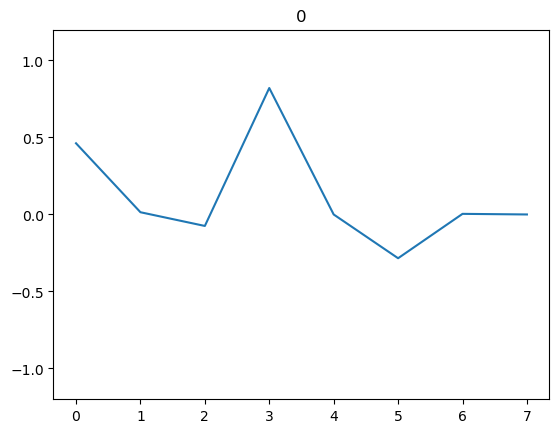


(8887, 8) (8887,)


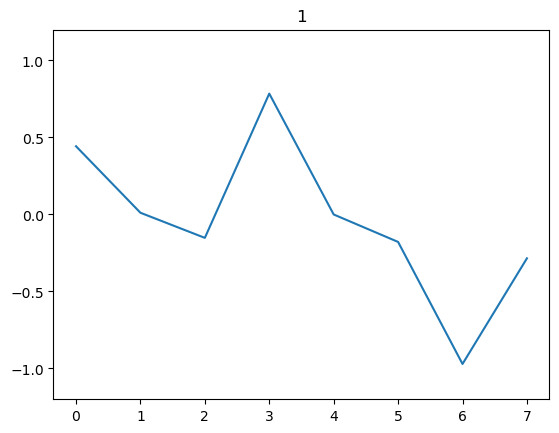


(647, 8) (647,)


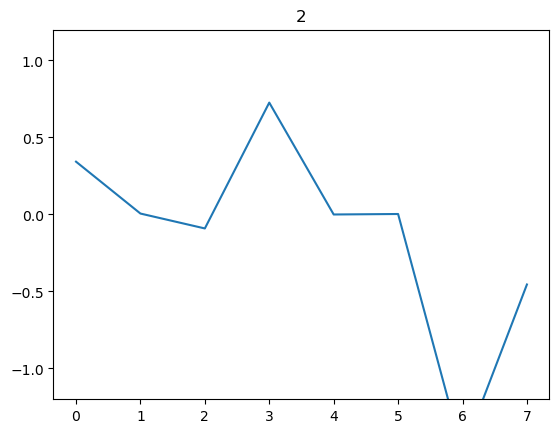


(374, 8) (374,)


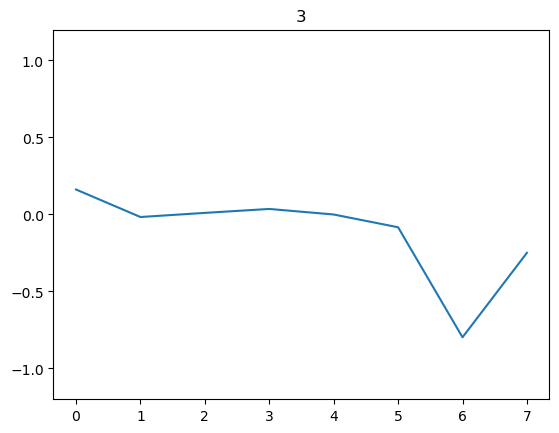


(1192, 8) (1192,)


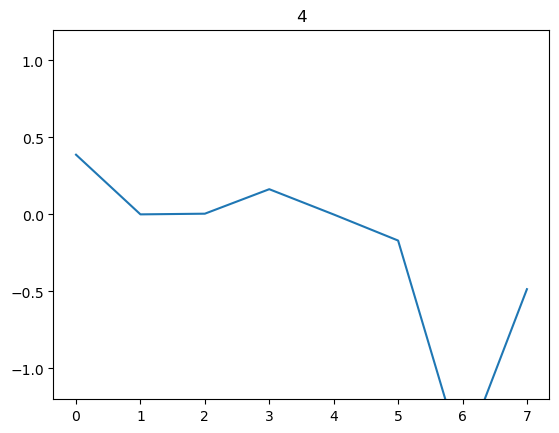


(4612, 8) (4612,)


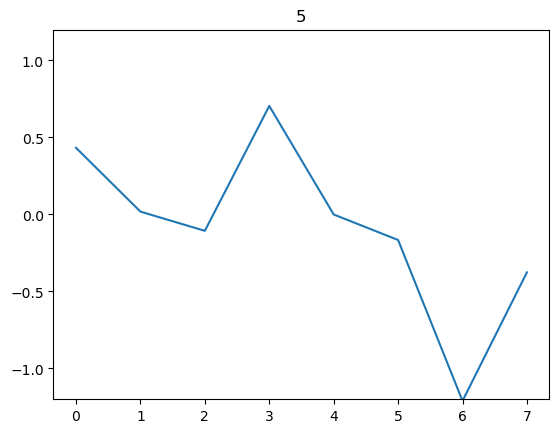


(1640, 8) (1640,)


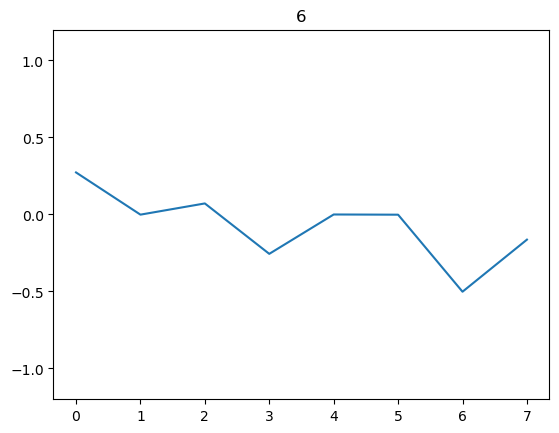


(390, 8) (390,)


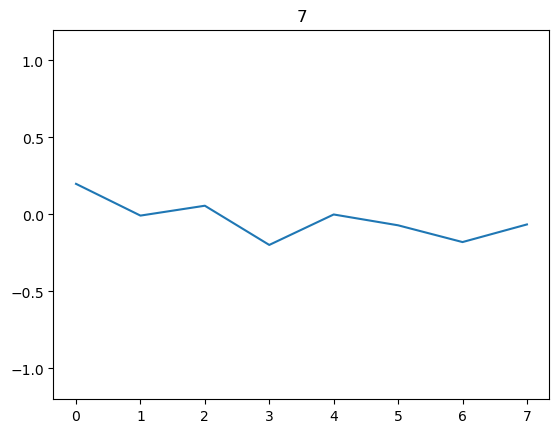


(224, 8) (224,)


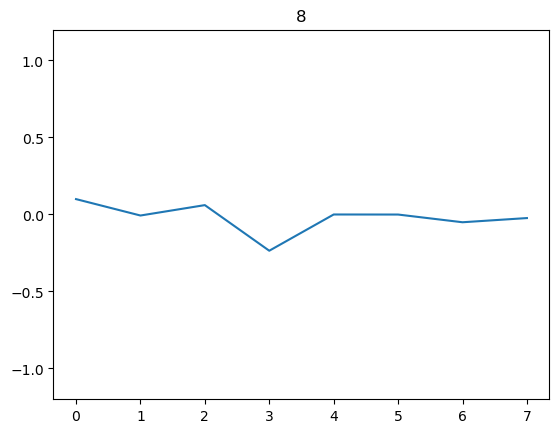


(0, 8) (0,)


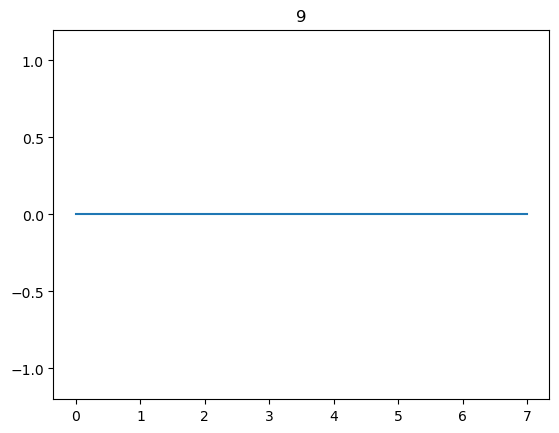

ZeroDivisionError: division by zero

In [8]:
var_squared = []
betas = []

for i in range(N):
    X_small, y_small = X_splits_train[i], y_splits_train[i]
    print(X_small.shape, y_small.shape)
    
    c, tr = run_lin_reg(X_small, y_small)
    
    betas.append(c)
    
    plt.plot(c)
    plt.gca().set_ylim([-1.2,1.2])
    plt.title(f"{i}")
    plt.show()
    
    m = X_small.shape[0]
    r = sum((y_small - X_small.dot(c))**2)
    var_squared.append(r/m*tr)
    print()

betas = np.array(betas)
print(betas.shape)

In [9]:
def get_weights(E_bs_hats, bs_star, var_squared):
    C = E_bs_hats.dot(E_bs_hats.T)
    K = bs_star.dot(E_bs_hats.T)
    return scipy.linalg.solve(C + np.diag(var_squared), K.T, assume_a='sym').T

In [10]:
num_iter = 2
n = betas.shape[0]
d = betas.shape[1]

# OLS. iterative fusion, update W and bs_hat
new_est = betas
W_hats = []
for ii in range(num_iter):
    W_hat = get_weights(new_est, new_est, var_squared)
    new_est = W_hat.dot(new_est)
    W_hats.append(W_hat)

AttributeError: 'list' object has no attribute 'shape'

In [111]:
new_est = betas
for W in W_hats:
    new_est = W.dot(new_est)

auc_results = np.zeros((2, N))

for ii, iii in enumerate(range(N)):
    print(iii, N)
    print( )
    auc_results[0, ii] = ((y_splits_test[ii] - X_splits_test[ii].dot(betas[ii, :]).shape) ** 2).mean()
    auc_results[1, ii] = ((y_splits_test[ii] - X_splits_test[ii].dot(new_est[ii, :]).shape) ** 2).mean()
    
    print('before fusion:', np.round(auc_results[0, ii], 4))
    print('after fusion:', np.round(auc_results[1, ii], 4))
    print( )

0 6

before fusion: 9624.3071
after fusion: 9624.3071

1 6

before fusion: 9474.8153
after fusion: 9474.8153

2 6

before fusion: 9865.4617
after fusion: 9865.4617

3 6

before fusion: 9729.0465
after fusion: 9729.0465

4 6

before fusion: 9850.2129
after fusion: 9850.2129

5 6

before fusion: 9847.1667
after fusion: 9847.1667



In [113]:
betas

array([[ 5.06471861e-01,  1.28452608e-02, -2.33787942e-01,
         1.14449884e+00,  4.80824314e-06, -1.57269441e-01,
        -6.35502144e-02, -2.04426898e-02],
       [ 3.76506891e-01,  5.71442017e-03, -3.97259043e-02,
         1.96073501e-01, -3.97804546e-05,  8.91453114e-04,
        -1.17310644e+00, -3.45647303e-01],
       [ 4.49949106e-01,  6.96432430e-03, -5.58673882e-02,
         3.73469267e-01,  3.24729154e-05, -1.65564445e-01,
        -1.07903506e+00, -3.30232811e-01],
       [ 4.49742540e-01,  1.53077215e-02, -1.28187724e-01,
         5.69514434e-01,  2.83437997e-05, -3.78006345e-03,
        -6.59972968e-01, -2.04971236e-01],
       [ 1.95803731e-01, -6.77484133e-03,  7.59853342e-02,
        -2.67864625e-01,  2.98117015e-05, -2.57991636e-02,
        -1.43270107e-01, -5.14421842e-02],
       [ 1.68054169e-01, -5.91204031e-03, -1.75779667e-02,
         1.75631834e-01, -1.93671656e-05, -8.89466571e-04,
        -1.37620440e-01, -5.00173943e-02]])

In [114]:
new_est

array([[ 5.02643873e-01,  1.43702802e-02, -2.36012690e-01,
         1.14078178e+00,  1.41452033e-05, -1.41474987e-01,
        -6.62997139e-02, -2.33850875e-02],
       [ 3.86170630e-01,  9.33093096e-03, -4.22885283e-02,
         1.94421159e-01, -2.39640805e-06,  5.83136662e-03,
        -1.16110544e+00, -3.49280367e-01],
       [ 4.74189830e-01,  8.17025682e-03, -6.88423516e-02,
         3.72490559e-01,  2.73069241e-06, -7.10968239e-02,
        -1.06606391e+00, -3.21573472e-01],
       [ 4.41116305e-01,  1.16429830e-02, -1.20629581e-01,
         5.69260554e-01,  9.01648506e-06, -3.74413467e-02,
        -6.61123194e-01, -2.01771920e-01],
       [ 1.75457551e-01, -6.30711852e-03,  7.26253672e-02,
        -2.58982673e-01,  2.79429742e-05, -2.07925418e-02,
        -1.48225889e-01, -5.26582459e-02],
       [ 1.60583675e-01,  2.63919275e-03, -3.35946109e-02,
         1.72234408e-01,  8.61590543e-06, -1.94924626e-02,
        -1.41380562e-01, -4.50484240e-02]])